<a href="https://colab.research.google.com/github/AKumar098/Ak_Project/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel 

<ipython-input-2-5a148adf5873>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='coolwarm')


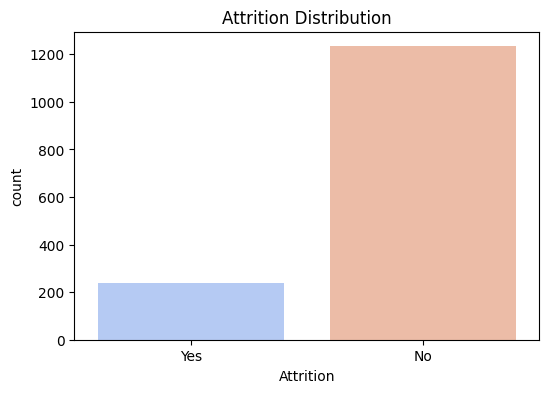

<ipython-input-2-5a148adf5873>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Age', data=df, palette='coolwarm')


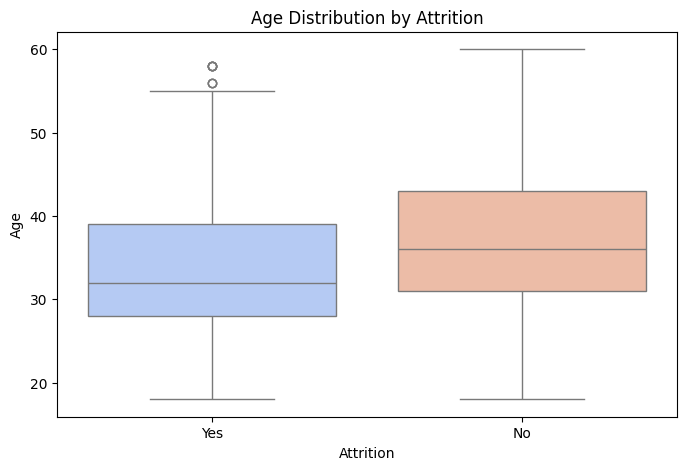

<ipython-input-2-5a148adf5873>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')


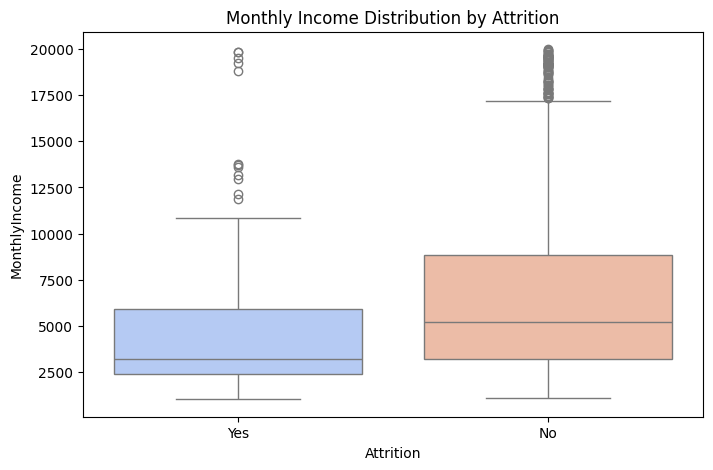

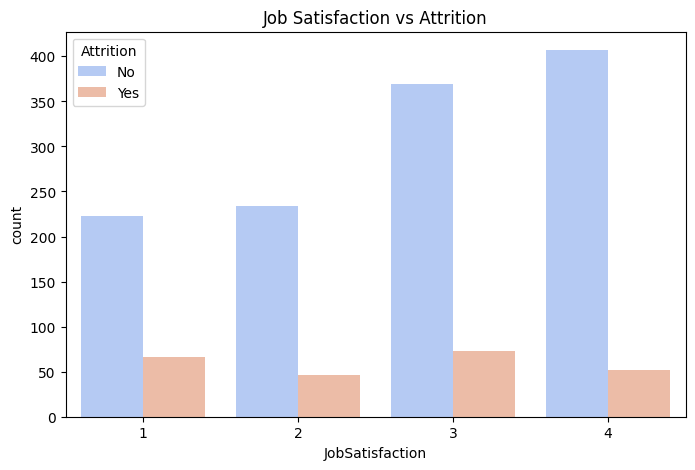


Model Accuracy: 0.8299319727891157

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.38      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



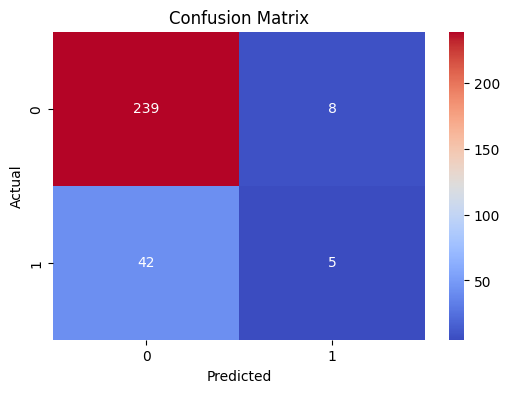

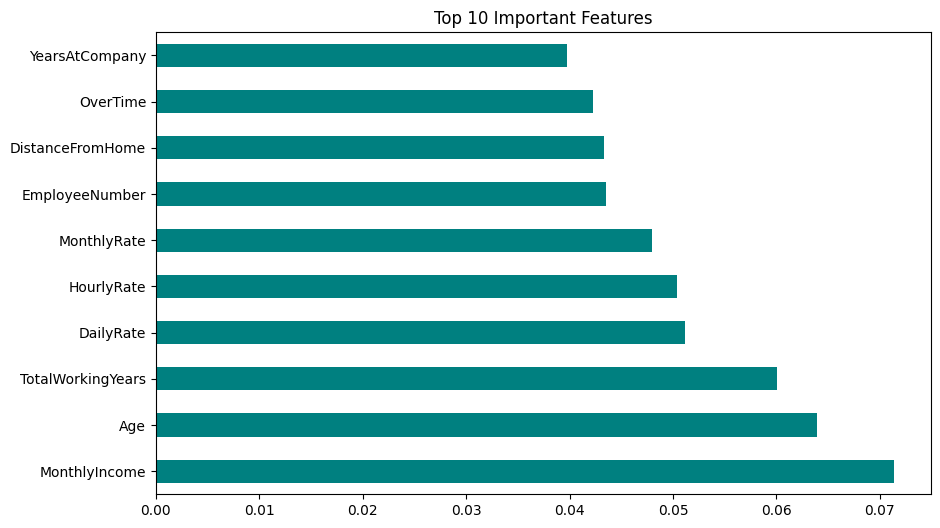


Attrition Prediction for Sample Employee:
 Likely to Leave


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("IBM Employee Attrition Data.csv")

# Display basic info
print("Dataset Info:\n")
df.info()
print("\nFirst 5 Rows:\n", df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Visualizing attrition distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='coolwarm')
plt.title("Attrition Distribution")
plt.show()

# Additional Visualizations
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='Age', data=df, palette='coolwarm')
plt.title("Age Distribution by Attrition")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')
plt.title("Monthly Income Distribution by Attrition")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='coolwarm')
plt.title("Job Satisfaction vs Attrition")
plt.show()

# Encoding categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting data into features and target
X = df.drop(columns=['Attrition'])  # Assuming 'Attrition' is the target variable
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
model = grid_search.best_estimator_

# Model training
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.show()

# Example function to predict attrition for a new employee
def predict_attrition(employee_data):
    employee_df = pd.DataFrame([employee_data], columns=X.columns)
    employee_df = scaler.transform(employee_df)
    prediction = model.predict(employee_df)
    return "Likely to Leave" if prediction[0] == 1 else "Likely to Stay"

# Example Usage
sample_employee = X_test[0]  # Using a sample from the test set
prediction = predict_attrition(sample_employee)
print("\nAttrition Prediction for Sample Employee:\n", prediction)